In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [9]:
tick = "AAPL"
df = yf.download(tick,  rounding = True )
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,0.10,469033600
1980-12-15,0.12,0.12,0.12,0.12,0.09,175884800
1980-12-16,0.11,0.11,0.11,0.11,0.09,105728000
1980-12-17,0.12,0.12,0.12,0.12,0.09,86441600
1980-12-18,0.12,0.12,0.12,0.12,0.09,73449600
...,...,...,...,...,...,...
2024-01-02,187.15,188.44,183.89,185.64,185.64,82488700
2024-01-03,184.22,185.88,183.43,184.25,184.25,58414500
2024-01-04,182.15,183.09,180.88,181.91,181.91,71983600


In [10]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.13,0.13,0.13,0.13,0.10,469033600
1,1980-12-15,0.12,0.12,0.12,0.12,0.09,175884800
2,1980-12-16,0.11,0.11,0.11,0.11,0.09,105728000
3,1980-12-17,0.12,0.12,0.12,0.12,0.09,86441600
4,1980-12-18,0.12,0.12,0.12,0.12,0.09,73449600
...,...,...,...,...,...,...,...
10853,2024-01-02,187.15,188.44,183.89,185.64,185.64,82488700
10854,2024-01-03,184.22,185.88,183.43,184.25,184.25,58414500
10855,2024-01-04,182.15,183.09,180.88,181.91,181.91,71983600
10856,2024-01-05,181.99,182.76,180.17,181.18,181.18,62303300


In [11]:
def sma(df, period=30, column = "Close"):
    return df[column].rolling(window = period).mean()

def ema(df, period=30, column = "Close"):
    return df[column].ewm(span = period, adjust = False).mean()

In [12]:
def macd(df, period_long = 26, period_short = 12, period_signal = 9, column = "Close"):
    shortEMA = ema(df, period_short, column = column)
    longEMA = ema(df, period_long, column = column)
    df["macd"] = shortEMA - longEMA
    df["signal_line"] = ema(df, period_signal, column = "macd" )
    return df

In [13]:
def rsi(df,period = 14, column = "Close"):
    delta = df[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0 ] = 0
    down[down > 0] = 0
    df["up"] = up
    df["down"] = down
    AVG_gain = sma(df,period, column = "up")
    AVG_loss = abs(sma(df,period, column = "down"))
    rs = AVG_gain / AVG_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    
    df["RSI"] = rsi
    
    return df

In [14]:
macd(df)
rsi(df)
df["SMA_30"] = sma(df)
df["EMA_30"] = ema(df)

In [15]:
df["SMA_12"] = sma(df, 12)
df["EMA_12"] = ema(df, 12)
df["SMA_24"] = sma(df, 24)
df["EMA_24"] = ema(df, 24)
df["SMA_50"] = sma(df, 50)
df["EMA_50"] = ema(df, 50)
df["SMA_200"] = sma(df, 200)
df["EMA_200"] = ema(df, 200)

In [16]:
""" 
df = df.dropna()
df["y_num"] = (df["Close"] - df["Open"]) 
df["y_num_shift"] = df["y_num"].shift(-1)
df["y"] = y =  np.where(df["y_num_shift"]>= 0, 1,0)
x = df.drop(columns = ["y", "y_num", "y_num_shift", "Date"])
x
"""

' \ndf = df.dropna()\ndf["y_num"] = (df["Close"] - df["Open"]) \ndf["y_num_shift"] = df["y_num"].shift(-1)\ndf["y"] = y =  np.where(df["y_num_shift"]>= 0, 1,0)\nx = df.drop(columns = ["y", "y_num", "y_num_shift", "Date"])\nx\n'

In [17]:
df = df.dropna()
df["y_num"] = df["Close"].pct_change(5).shift(-5)
df["y"] = np.where(df["y_num"]>= 0, 1,0)
df = df.dropna()
y = df["y"]
x = df.drop(columns = ["y", "y_num", "Date"])
df

C:\Users\yaniv\AppData\Local\Temp\ipykernel_26108\3536110871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_num"] = df["Close"].pct_change(5).shift(-5)
C:\Users\yaniv\AppData\Local\Temp\ipykernel_26108\3536110871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"] = np.where(df["y_num"]>= 0, 1,0)


,Date,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,up,...,SMA_12,EMA_12,SMA_24,EMA_24,SMA_50,EMA_50,SMA_200,EMA_200,y_num,y
199,1981-09-28,0.06,0.06,0.06,0.06,0.05,91728000,-0.008599,-0.006701,0.00,...,0.075833,0.074157,0.083333,0.081741,0.0948,0.092396,0.11825,0.113193,0.333333,1
200,1981-09-29,0.07,0.07,0.07,0.07,0.05,94684800,-0.008294,-0.007020,0.01,...,0.074167,0.073518,0.082500,0.080801,0.0940,0.091518,0.11795,0.112763,0.142857,1
201,1981-09-30,0.07,0.07,0.07,0.07,0.05,49996800,-0.007960,-0.007208,0.00,...,0.073333,0.072977,0.082083,0.079937,0.0932,0.090674,0.11770,0.112338,0.142857,1
202,1981-10-01,0.07,0.07,0.07,0.07,0.05,61129600,-0.007608,-0.007288,0.00,...,0.072500,0.072519,0.081250,0.079142,0.0926,0.089863,0.11750,0.111917,0.142857,1
203,1981-10-02,0.07,0.07,0.07,0.07,0.06,45046400,-0.007245,-0.007279,0.00,...,0.071667,0.072131,0.080417,0.078411,0.0920,0.089084,0.11725,0.111500,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,2023-12-22,195.18,195.41,192.97,193.60,193.60,37122800,2.636316,3.236689,0.00,...,195.620833,194.738888,193.197500,192.510614,185.3988,188.226228,178.64910,177.501019,-0.041116,0
10849,2023-12-26,193.61,193.89,192.83,193.05,193.05,28919300,2.306308,3.050613,0.00,...,195.519167,194.479059,193.264167,192.553765,185.6828,188.415396,178.87185,177.655736,-0.045584,0
10850,2023-12-27,192.49,193.50,191.09,193.15,193.15,48087700,2.029448,2.846380,0.10,...,195.305833,194.274588,193.368750,192.601464,185.9714,188.601066,179.08525,177.809907,-0.058193,0
10851,2023-12-28,194.14,194.66,193.17,193.58,193.58,34049900,1.823710,2.641846,0.43,...,195.339167,194.167729,193.463333,192.679747,186.3000,188.796319,179.29020,177.966824,-0.064056,0


C:\Users\yaniv\AppData\Local\Temp\ipykernel_26108\4242060626.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print (df.mean())


Open           2.062131e+01
High           2.084703e+01
Low            2.040417e+01
Close          2.063518e+01
Adj Close      1.986405e+01
Volume         3.289896e+08
macd           1.267007e-01
signal_line    1.257801e-01
up             1.468659e-01
down          -1.286310e-01
RSI            5.342251e+01
SMA_30         2.036880e+01
EMA_30         2.037192e+01
SMA_12         2.053414e+01
EMA_12         2.053418e+01
SMA_24         2.042347e+01
EMA_24         2.042535e+01
SMA_50         2.019114e+01
EMA_50         2.019682e+01
SMA_200        1.890811e+01
EMA_200        1.895714e+01
y_num          5.804774e-03
y              6.178115e-01
dtype: float64


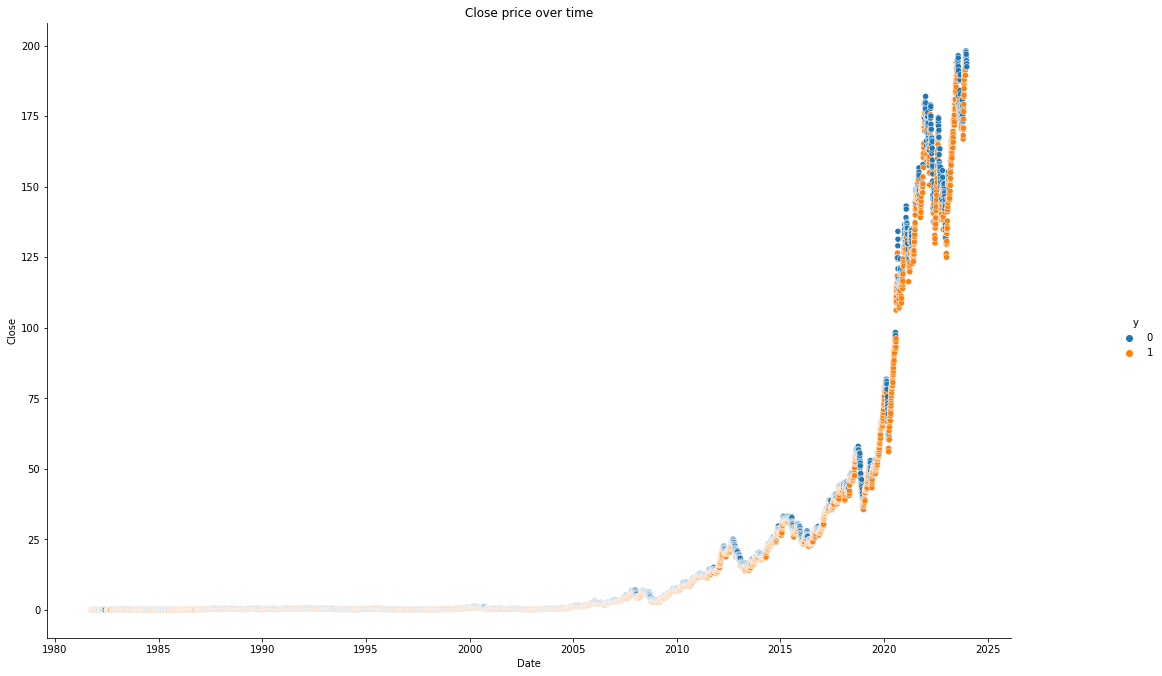

In [18]:
print (df.mean())
fig = sns.relplot(x = "Date", y = "Close", hue = "y", data = df).set(title='Close price over time')
fig.figure.set_size_inches(18, 10)
sns.despine()


<AxesSubplot:xlabel='y', ylabel='Count'>

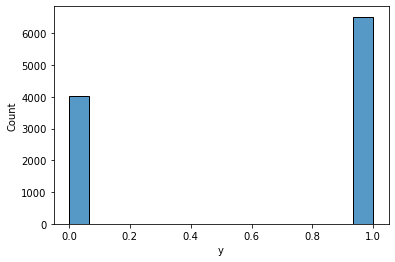

In [19]:
sns.histplot(data=df, x="y")


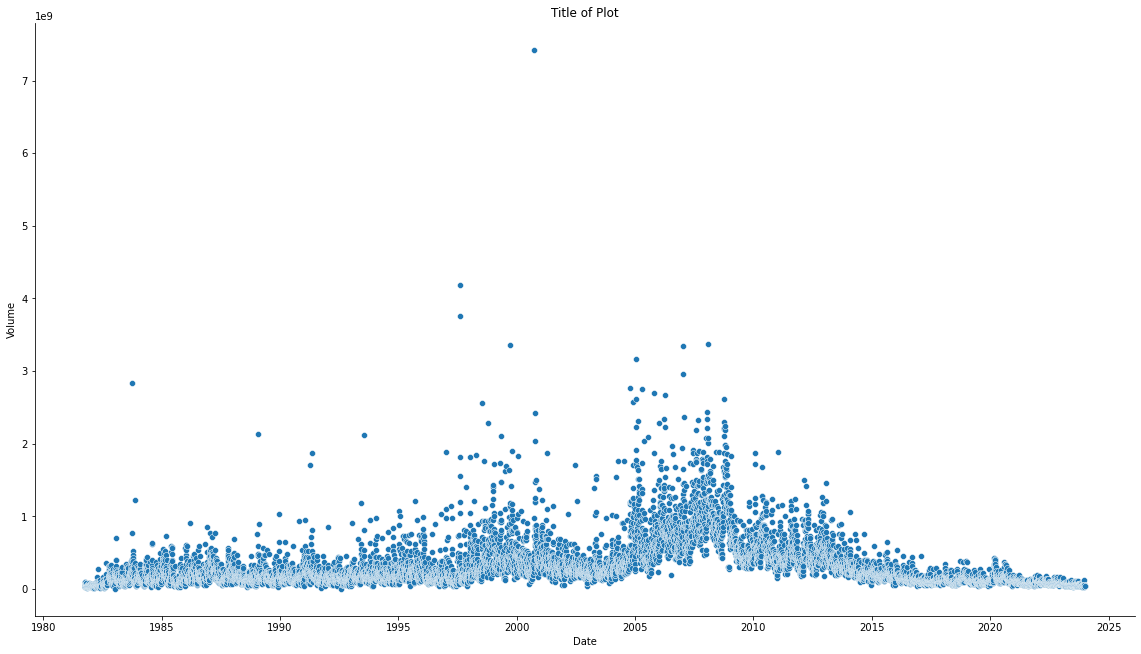

In [20]:
fig = sns.relplot(x = "Date", y = "Volume", data = df).set(title='Title of Plot')
fig.figure.set_size_inches(18, 10)
sns.despine()

In [21]:
# MIN-MAX:
columns_name = x.columns
print(columns_name)


for col in columns_name:
    x_max = x[col].max()
    x_min = x[col].min()
    if x_max == 0:
        continue 
    x[col] = x[col].apply(lambda x : (x-x_min)/(x_max-x_min))
    print(col)

x.head()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'macd',
       'signal_line', 'up', 'down', 'RSI', 'SMA_30', 'EMA_30', 'SMA_12',
       'EMA_12', 'SMA_24', 'EMA_24', 'SMA_50', 'EMA_50', 'SMA_200', 'EMA_200'],
      dtype='object')
Open
High
Low
Close
Adj Close
Volume
macd
signal_line
up
RSI
SMA_30
EMA_30
SMA_12
EMA_12
SMA_24
EMA_24
SMA_50
EMA_50
SMA_200
EMA_200


,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,up,down,...,SMA_30,EMA_30,SMA_12,EMA_12,SMA_24,EMA_24,SMA_50,EMA_50,SMA_200,EMA_200
199,0.000051,0.00005,0.000051,0.000050,0.000050,0.012175,0.469841,0.456995,0.000000,0.0,...,0.000145,0.000141,0.000107,0.000105,0.000133,0.000131,0.000193,0.000172,0.000255,0.000229
200,0.000101,0.00010,0.000102,0.000101,0.000050,0.012573,0.469863,0.456970,0.000833,0.0,...,0.000140,0.000136,0.000098,0.000102,0.000129,0.000126,0.000189,0.000167,0.000253,0.000226
201,0.000101,0.00010,0.000102,0.000101,0.000050,0.006551,0.469886,0.456955,0.000000,0.0,...,0.000135,0.000132,0.000094,0.000099,0.000127,0.000122,0.000185,0.000163,0.000252,0.000224
202,0.000101,0.00010,0.000102,0.000101,0.000050,0.008051,0.469911,0.456949,0.000000,0.0,...,0.000130,0.000128,0.000089,0.000097,0.000123,0.000118,0.000181,0.000159,0.000251,0.000222
203,0.000101,0.00010,0.000102,0.000101,0.000101,0.005884,0.469936,0.456950,0.000000,0.0,...,0.000124,0.000123,0.000085,0.000095,0.000118,0.000114,0.000178,0.000154,0.000249,0.000219


In [22]:
#  Standardization of continuous Variables (Z-score):

""" 
for col in columns_name:
    x_mean = x[col].mean()
    x_std = x[col].std()
    if x_max == 0:
        continue 
    x[col] = x[col].apply(lambda x : (x-x_mean)/x_std)
    print(col)

x.head()

"""

' \nfor col in columns_name:\n    x_mean = x[col].mean()\n    x_std = x[col].std()\n    if x_max == 0:\n        continue \n    x[col] = x[col].apply(lambda x : (x-x_mean)/x_std)\n    print(col)\n\nx.head()\n\n'

In [23]:
claa_0_basline = df["y"][df["y"] == 0].count() / df["y"].count()
claa_1_basline = df["y"][df["y"] == 1].count() / df["y"].count()
print("basline of class 0:", claa_0_basline)
print("basline of class 1:",claa_1_basline)

basline of class 0: 0.38218853623874943
basline of class 1: 0.6178114637612506


In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=423)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=423)
treeClassifier = DecisionTreeClassifier(criterion = "entropy",max_depth = 9, min_samples_leaf = 3)
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3)

In [33]:
y_pred = treeClassifier.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, treeClassifier.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, treeClassifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.14      0.21       789
           1       0.64      0.92      0.76      1322

    accuracy                           0.63      2111
   macro avg       0.57      0.53      0.48      2111
weighted avg       0.59      0.63      0.55      2111

Roc_Auc_Score on Training Set: 0.5748576456714594
Roc_Auc_Score on Test Set: 0.527716579519068


C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


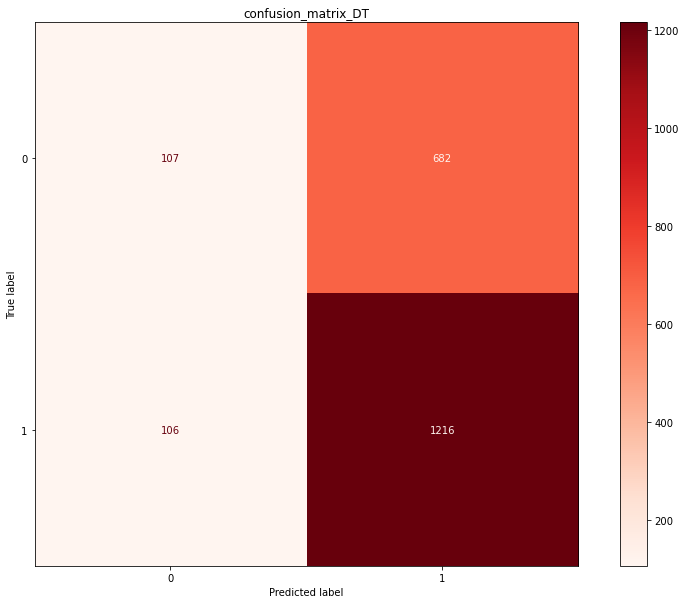

In [34]:
matrix = plot_confusion_matrix(treeClassifier, x_test, y_test, cmap= plt.cm.Reds) 
matrix.ax_.set_title("confusion_matrix_DT")
plt.gcf().set_size_inches(15,10)
plt.show()

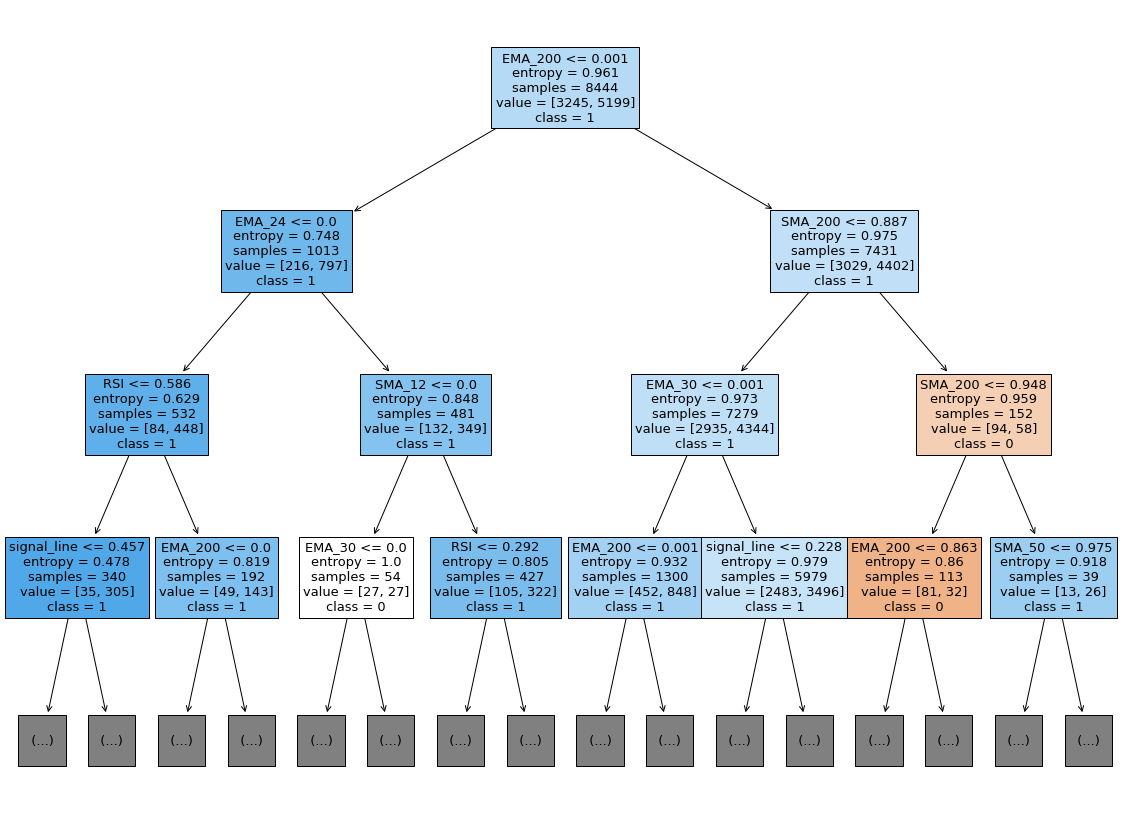

In [30]:
plt.figure(figsize=(20, 15))
plot_tree(treeClassifier, filled=True, max_depth=3,feature_names = x_train.columns, class_names=['0', '1'], fontsize=13)
plt.show()

In [37]:
param_DT = {
    "max_depth": np.arange(2, 10, 1),
    "criterion": ['entropy', 'gini'],
    "min_samples_split": np.arange(2, 10, 2)  # Start from 2 instead of 1
}

model_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=param_DT,
                       refit=True,
                       cv=5)

model_DT.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 4, 6, 8])})

In [38]:
# best_estimator
best_model_DT = model_DT.best_estimator_
print("best_estimator:", model_DT.best_params_)

# report
y_pred = best_model_DT.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

# ROC - AUC 
print("Roc_Auc_Score: train_set",roc_auc_score(y_train, best_model_DT.predict(x_train)))
print("Roc_Auc_Score: val_set ",roc_auc_score(y_test, best_model_DT.predict(x_test)))

best_estimator: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 6}
              precision    recall  f1-score   support

           0       0.55      0.14      0.22       789
           1       0.64      0.93      0.76      1322

    accuracy                           0.64      2111
   macro avg       0.60      0.54      0.49      2111
weighted avg       0.61      0.64      0.56      2111

Roc_Auc_Score: train_set 0.578828600142673
Roc_Auc_Score: val_set  0.5352808760394916


In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression()

In [40]:
y_pred = log_reg.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, log_reg.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.55      0.03      0.06       789
           1       0.63      0.99      0.77      1322

    accuracy                           0.63      2111
   macro avg       0.59      0.51      0.41      2111
weighted avg       0.60      0.63      0.50      2111

Roc_Auc_Score on Training Set: 0.5078872285205968
Roc_Auc_Score on Test Set: 0.5073893302194125


C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


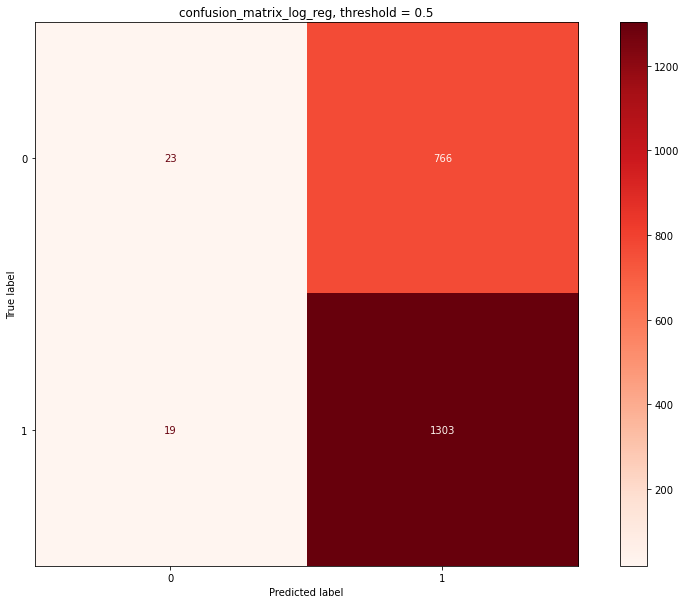

In [41]:
matrix = plot_confusion_matrix(log_reg, x_test, y_test, cmap= plt.cm.Reds) 
matrix.ax_.set_title("confusion_matrix_log_reg, threshold = 0.5")
plt.gcf().set_size_inches(15,10)
plt.show()

C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


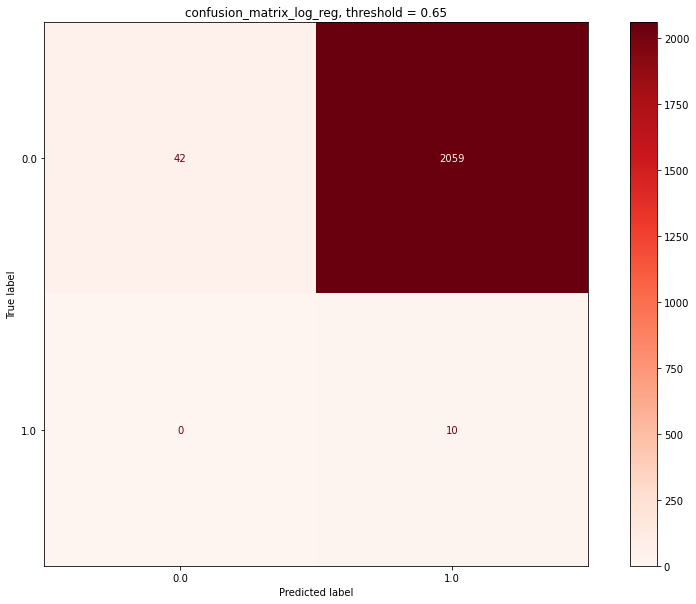

In [42]:
threshold = 0.65
y_pred = (log_reg.predict_proba(x_test)[:, 1] > threshold).astype('float')
matrix = plot_confusion_matrix(log_reg, x_test, y_pred, cmap= plt.cm.Reds) 
matrix.ax_.set_title("confusion_matrix_log_reg, threshold = 0.65")
plt.gcf().set_size_inches(15,10)
plt.show()


In [43]:
param_lgr = {'C': [0.1, 1, 10]}

model_lgr = GridSearchCV(estimator=log_reg,
                           param_grid=param_lgr,
                           refit=True,
                           cv=5)

model_lgr.fit(x_train, y_train)

C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [44]:
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, model_lgr.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, model_lgr.predict(x_test)))

Roc_Auc_Score on Training Set: 0.5107600104441088
Roc_Auc_Score on Test Set: 0.511958107794581


In [45]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [46]:
y_pred = svm_model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, svm_model.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, svm_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05       789
           1       0.63      0.98      0.77      1322

    accuracy                           0.63      2111
   macro avg       0.56      0.51      0.41      2111
weighted avg       0.58      0.63      0.50      2111

Roc_Auc_Score on Training Set: 0.510890295069782
Roc_Auc_Score on Test Set: 0.5053654734444297


In [ ]:
matrix = plot_confusion_matrix(svm_model, x_test, y_test, cmap= plt.cm.Reds) 
matrix.ax_.set_title("confusion_matrix_svm_model")
plt.gcf().set_size_inches(1,10)
plt.show()

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(150,100,50,40,30,20,10)).fit(x_train, y_train)

clf.predict(x_test)
clf.score(x_test, y_test)

y_pred = svm_model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, clf.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05       789
           1       0.63      0.98      0.77      1322

    accuracy                           0.63      2111
   macro avg       0.56      0.51      0.41      2111
weighted avg       0.58      0.63      0.50      2111

Roc_Auc_Score on Training Set: 0.6054665010546356
Roc_Auc_Score on Test Set: 0.5459595727179121


In [55]:
y_pred = clf.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, clf.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.51      0.22      0.30       789
           1       0.65      0.88      0.75      1322

    accuracy                           0.63      2111
   macro avg       0.58      0.55      0.53      2111
weighted avg       0.60      0.63      0.58      2111

Roc_Auc_Score on Training Set: 0.6054665010546356
Roc_Auc_Score on Test Set: 0.5459595727179121


In [56]:
from sklearn.svm import LinearSVC

# Training the Baseline model
model_SVC = LinearSVC(C=1,max_iter = 2000,random_state = 77)
model_SVC.fit(x_train, y_train)

C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, max_iter=2000, random_state=77)

In [57]:
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, model_SVC.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, model_SVC.predict(x_test)))

Roc_Auc_Score on Training Set: 0.510201588488482
Roc_Auc_Score on Test Set: 0.51221360653003


In [58]:
from sklearn import ensemble
RF = ensemble.RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = RF.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, RF.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, RF.predict(x_test)))


              precision    recall  f1-score   support

           0       0.81      0.71      0.76       789
           1       0.84      0.90      0.87      1322

    accuracy                           0.83      2111
   macro avg       0.83      0.81      0.81      2111
weighted avg       0.83      0.83      0.83      2111

Roc_Auc_Score on Training Set: 1.0
Roc_Auc_Score on Test Set: 0.807612807724978


C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


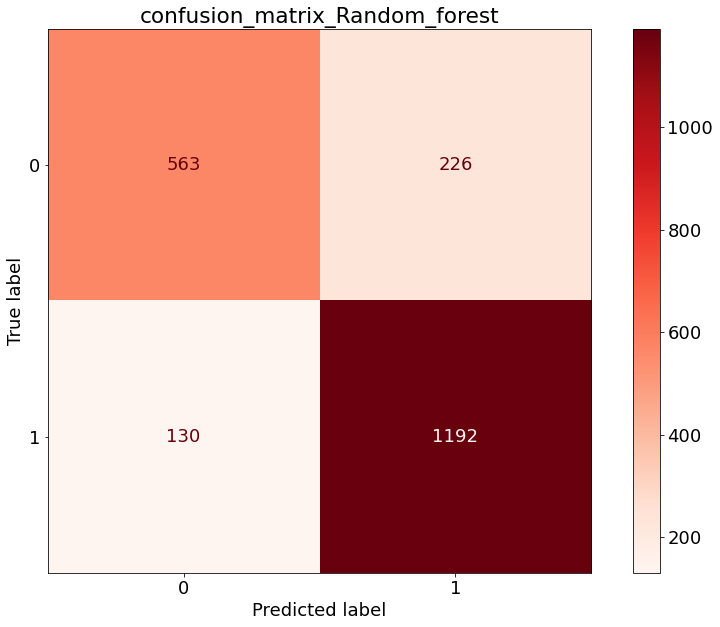

In [61]:
import matplotlib as mpl
mpl.rcParams["font.size"] = 18

matrix = plot_confusion_matrix(RF, x_test, y_test, cmap=plt.cm.Reds) 
matrix.ax_.set_title("confusion_matrix_Random_forest")
plt.gcf().set_size_inches(15, 10)
plt.show()  # Make sure to close the show() function with a closing parenthesis


In [62]:
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier
bg_DT = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 20)
bg_DT.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [63]:
print("Roc_Auc_Score on Training Set:",roc_auc_score(y_train, bg_DT.predict(x_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(y_test, bg_DT.predict(x_test)))

Roc_Auc_Score on Training Set: 0.9980362171106154
Roc_Auc_Score on Test Set: 0.7740542711910555


In [68]:
# Assuming you have defined your SVM model and parameter grid
SVM_model = SVC(probability=True)
param_SVM = {
    # your SVM parameters here
}

# Assuming you have already defined x_train and y_train
GS_SVM = GridSearchCV(SVM_model, param_SVM, cv=5)
GS_SVM.fit(x_train, y_train)
df_score = pd.DataFrame({
    "MODEL": ["Random_forest", "BaggingClassifier (DT)", "Decision_tree", "Logistic_Regrretion", "SVM"],
    "ROC-AUC score": [
        roc_auc_score(y_test, RF.predict(x_test)),
        roc_auc_score(y_test, bg_DT.predict(x_test)),
        roc_auc_score(y_test, best_model_DT.predict(x_test)),
        roc_auc_score(y_test, log_reg.predict(x_test)),
        roc_auc_score(y_test, GS_SVM.predict_proba(x_test)[:, 1])  # Use predict_proba for SVM
    ]
})

title = "Summary - " + tick
df_score = df_score.style.set_caption(title)
df_score


,MODEL,ROC-AUC score
0,Random_forest,0.807613
1,BaggingClassifier (DT),0.774054
2,Decision_tree,0.535281
3,Logistic_Regrretion,0.507389
4,SVM,0.533708


In [69]:
l_period = []
l_ROC = []
for i in [1,5,10,20,30,50]:
    # x y 
    df["y_num"] = df["Close"].pct_change(i).shift(-i)
    df["y"] = np.where(df["y_num"]>= 0, 1,0)
    df = df.dropna()
    y = df["y"]
    x = df.drop(columns = ["y", "y_num", "Date"])
    
    # split the data
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=423)
    
    # run the model
    RF = ensemble.RandomForestClassifier()
    RF.fit(x_train, y_train)
    
    # evaluate the model
    l_period.append(i)    
    l_ROC.append(roc_auc_score(y_test, RF.predict(x_test)))

C:\Users\yaniv\AppData\Local\Temp\ipykernel_26108\2190914232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_num"] = df["Close"].pct_change(i).shift(-i)
C:\Users\yaniv\AppData\Local\Temp\ipykernel_26108\2190914232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"] = np.where(df["y_num"]>= 0, 1,0)


[1, 5, 10, 20, 30, 50]
[0.5607692076650448, 0.804364827492406, 0.8607298944439404, 0.9023960187199261, 0.9220244451443893, 0.9394803224090023]


'\nax = plt.gca()\nax.set_ylim([0, 1])\n'

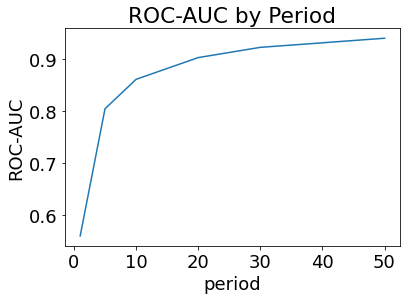

In [70]:
print(l_period)
print(l_ROC)

plt.plot(l_period, l_ROC)
plt.title("ROC-AUC by Period")
plt.xlabel("period")
plt.ylabel("ROC-AUC")

"""
ax = plt.gca()
ax.set_ylim([0, 1])
"""

In [71]:
df_v = df[6950:]
df_v

,Date,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,up,...,SMA_12,EMA_12,SMA_24,EMA_24,SMA_50,EMA_50,SMA_200,EMA_200,y_num,y
7248,2009-09-03,5.94,5.97,5.89,5.95,5.04,293955200,0.094295,0.126200,0.05,...,5.984167,5.955807,5.935417,5.879045,5.6004,5.627614,4.26055,4.827339,0.226891,1
7249,2009-09-04,5.97,6.10,5.97,6.08,5.16,374628800,0.097217,0.120404,0.13,...,6.000833,5.974914,5.941250,5.895121,5.6222,5.645355,4.27490,4.839803,0.213816,1
7250,2009-09-08,6.18,6.18,6.14,6.18,5.24,315047600,0.106376,0.117598,0.10,...,6.020833,6.006465,5.952500,5.917911,5.6440,5.666322,4.29040,4.853138,0.195793,1
7251,2009-09-09,6.17,6.23,6.06,6.11,5.18,811087200,0.106756,0.115430,0.00,...,6.026667,6.022394,5.961250,5.933279,5.6648,5.683721,4.30660,4.865644,0.204583,1
7252,2009-09-10,6.14,6.19,6.10,6.16,5.22,491134000,0.109825,0.114309,0.05,...,6.036667,6.043564,5.974167,5.951416,5.6862,5.702398,4.32265,4.878523,0.162338,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,2023-07-11,189.16,189.30,186.60,188.08,187.58,46638100,3.241527,3.732082,0.00,...,189.649167,189.012481,186.345833,186.258020,179.6060,180.202272,155.67140,163.061418,-0.066940,0
10733,2023-07-12,189.68,191.70,188.47,189.77,189.26,60750200,3.061843,3.598034,1.69,...,189.906667,189.129022,186.785833,186.538978,180.0078,180.577477,155.85655,163.327175,-0.083469,0
10734,2023-07-13,190.50,191.19,189.78,190.54,190.03,41342300,2.947596,3.467947,0.77,...,190.345833,189.346096,187.315833,186.859060,180.4268,180.968164,156.05710,163.597950,-0.082660,0
10735,2023-07-14,190.23,191.18,189.63,190.69,190.18,41573900,2.836462,3.341650,0.15,...,190.565000,189.552850,187.737500,187.165535,180.8698,181.349412,156.25670,163.867522,-0.076616,0


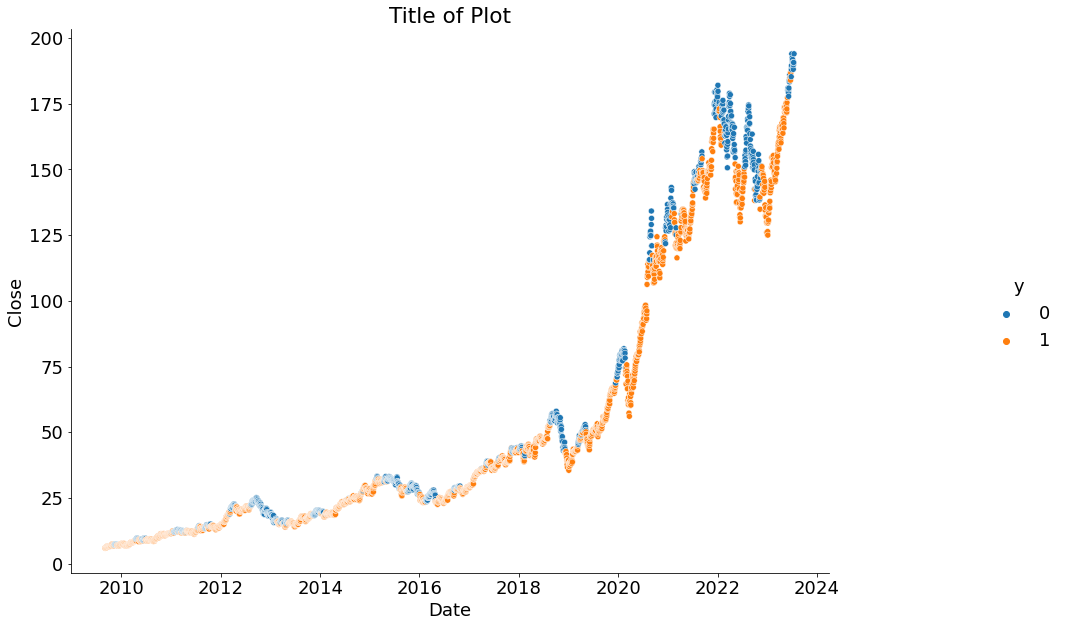

In [72]:
fig = sns.relplot(x = "Date", y = "Close", hue = "y", data = df_v).set(title='Title of Plot')
fig.figure.set_size_inches(18, 10)
sns.despine()